In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_pass.csv')

## Data Preparation

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Student,1.00,2.00,3.00,4.00,5.00,6.00,7.0,8.00,9.00,10.0,...,41.00,42.0,43.0,44.00,45.00,46.00,47.00,48.00,49.00,50.00
Hours_Studied,6.39,0.25,2.23,6.77,8.92,0.87,0.3,5.05,0.27,6.5,...,1.63,9.9,6.4,5.57,6.85,8.43,7.76,2.29,3.15,2.11
Pass,1.00,0.00,1.00,1.00,1.00,0.00,0.0,1.00,0.00,1.0,...,0.00,1.0,1.0,1.00,1.00,1.00,1.00,0.00,0.00,1.00


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head().T

,0,1,2,3,4
student,1.00,2.00,3.00,4.00,5.00
hours_studied,6.39,0.25,2.23,6.77,8.92
pass,1.00,0.00,1.00,1.00,1.00


In [6]:
df.dtypes

student            int64
hours_studied    float64
pass               int64
dtype: object

In [7]:
df.isnull().sum()

student          0
hours_studied    0
pass             0
dtype: int64

In [8]:
df_sz = df.shape[0]
df_sz

50

Since the dataset size is rather small, we will not split the data.

In [24]:
X = pd.DataFrame(df['hours_studied'])
y = df['pass'].values

## Visualize the Dataset

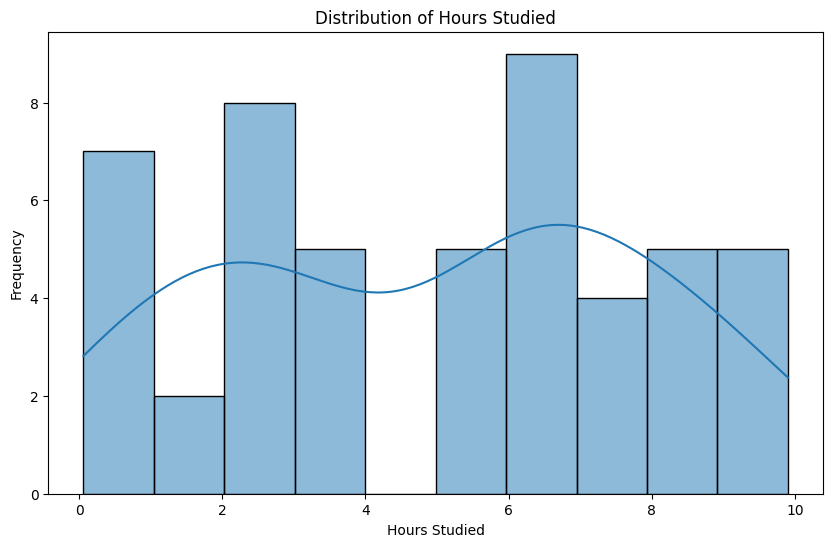

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours_studied'], bins=10, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()


---

## Logistic Regression using ScikitLearn

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(solver='liblinear')

In [28]:
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [34]:
model.coef_

array([[0.58484752]])

## Logistic Curve

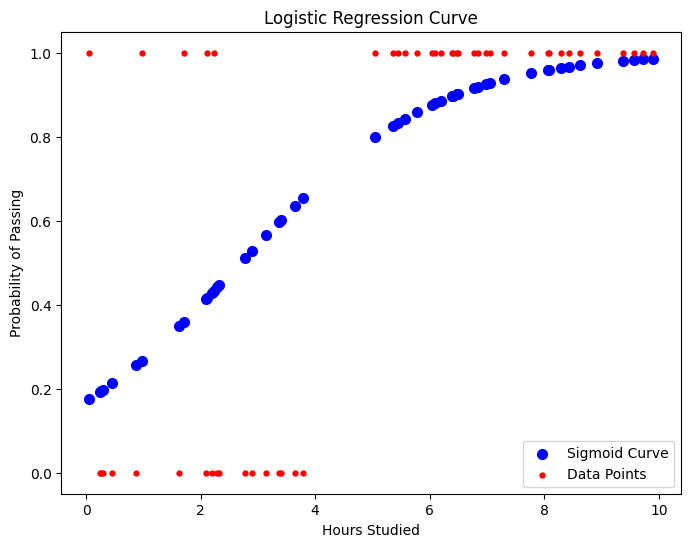

In [50]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.dot(X.values, model.coef_[0]) + model.intercept_
prob_pass = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.scatter(X, prob_pass, color='blue', linewidth=2, label='Sigmoid Curve')
plt.scatter(df['hours_studied'], df['pass'], color='red', marker='.', s=50, label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

---

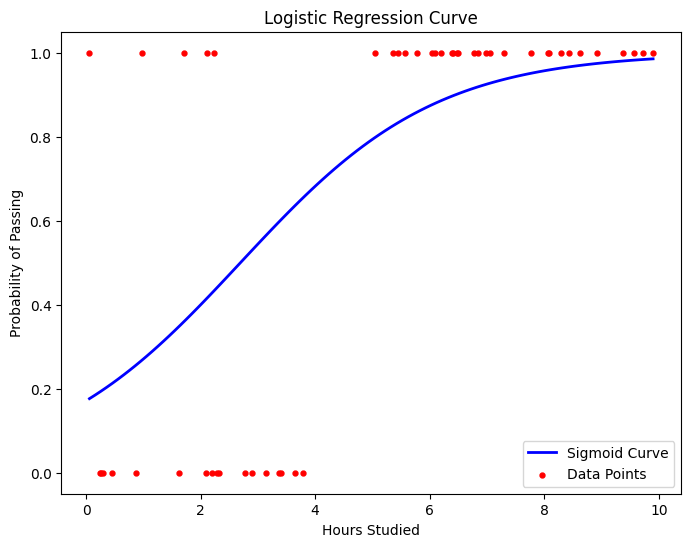

In [51]:
hours_range = np.linspace(df['hours_studied'].min(), df['hours_studied'].max(), 100)
z = hours_range * model.coef_[0] + model.intercept_
prob_pass = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(hours_range, prob_pass, color='blue', linewidth=2, label='Sigmoid Curve')
plt.scatter(df['hours_studied'], df['pass'], color='red', marker='.', s=50, label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

## Model Testing

Take 10 random samples from the dataset for model testing.

In [60]:
np.random.seed(0)
random_idx = np.random.randint(df_sz, size=10) 

In [61]:
random_idx

array([44, 47,  0,  3,  3, 39,  9, 19, 21, 36])

In [62]:
random_sample = df.iloc[random_idx]

In [63]:
random_sample.T

,44,47,0,3,3,39,9,19,21,36
student,45.00,48.00,1.00,4.00,4.00,40.00,10.0,20.00,22.0,37.00
hours_studied,6.85,2.29,6.39,6.77,6.77,1.71,6.5,6.04,7.3,9.37
pass,1.00,0.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.00


In [64]:
X_rand = pd.DataFrame(df['hours_studied'])
y_rand = df['pass']

In [65]:
# probability of passing
y_pred = model.predict_proba(X_rand)[:, 1]

In [66]:
pass_decision = y_pred > 0.5 #threshold
pass_decision = pass_decision.astype(int)

Compare the model prediction to the actual values.

In [67]:
(y_rand == pass_decision).mean()

0.76

Our model has 76% accuracy. But this is not a strict indicator of the model's robustness, as we have only little data to work with.